In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
comments=pd.read_csv("/content/UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
comments.head()

video_id                                       comment_text likes replies
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4       0
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3       0
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3       0
3  XpVt6Z1Gjjo                                MY FAN . attendance     3       0
4  XpVt6Z1Gjjo                                         trending 😉     3       0

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob


In [8]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [9]:
comments.isna().sum()

video_id        0
comment_text    2
likes           1
replies         1
dtype: int64

In [10]:
comments.dropna(inplace=True)

In [11]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
comments['polarity']=polarity

In [13]:
comments.head()

video_id  ... polarity
0  XpVt6Z1Gjjo  ...      0.0
1  XpVt6Z1Gjjo  ...      0.0
2  XpVt6Z1Gjjo  ...      0.0
3  XpVt6Z1Gjjo  ...      0.0
4  XpVt6Z1Gjjo  ...      0.0

[5 rows x 5 columns]

In [14]:
comments_positive=comments[comments['polarity']==1]

In [15]:
comments_positive.head()

video_id  ... polarity
64   XpVt6Z1Gjjo  ...      1.0
156  cLdxuaxaQwc  ...      1.0
227  WYYvHb03Eog  ...      1.0
307  sjlHnJvXdQs  ...      1.0
319  sjlHnJvXdQs  ...      1.0

[5 rows x 5 columns]

In [16]:
comments_positive.shape

(3909, 5)

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
stopwords=set(STOPWORDS)

In [20]:
total_comments=' '.join(comments_positive['comment_text'])

In [21]:
total_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [22]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

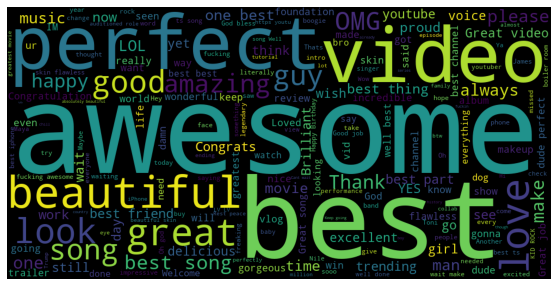

In [23]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [24]:
comments_negative=comments[comments['polarity']==-1]

In [25]:
comments_negative.head()

video_id  ... polarity
512   8wNr-NQImFg  ...     -1.0
562   8wNr-NQImFg  ...     -1.0
952   Ayb_2qbZHm4  ...     -1.0
1371  vu_9muoxT50  ...     -1.0
1391  vu_9muoxT50  ...     -1.0

[5 rows x 5 columns]

In [26]:
total_comments1=' '.join(comments_negative['comment_text'])

In [27]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments1)

(-0.5, 999.5, 499.5, -0.5)

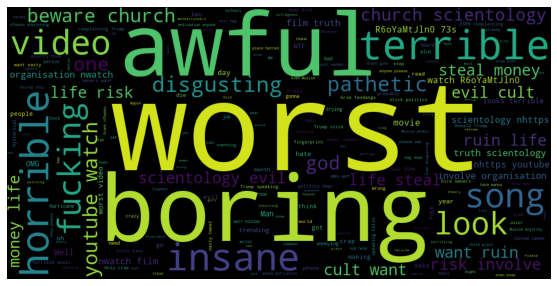

In [28]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Trending Tags

In [41]:
Videos=pd.read_csv('/content/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [42]:
Videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [43]:
tags_combined=' '.join(Videos['tags'])

In [44]:
tags_combined

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [45]:
import re # Regular Expression used to deal with text data

In [46]:
tags=re.sub('[^a-zA-Z]',' ',tags_combined)

In [47]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [48]:
tags=re.sub(' +',' ',tags)

In [49]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

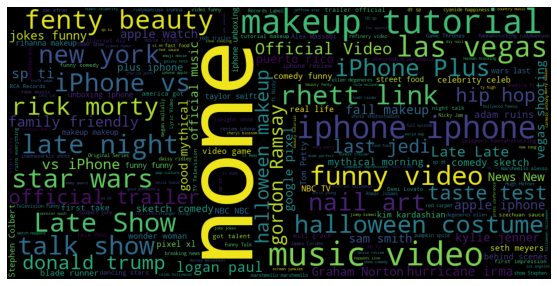

In [50]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'reg plot of views and likes')

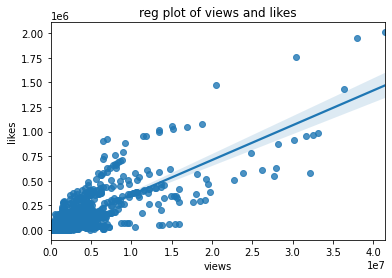

In [51]:
sns.regplot(data=Videos,x='views',y='likes')
plt.title("reg plot of views and likes")

Text(0.5, 1.0, 'reg plot of views and dislikes')

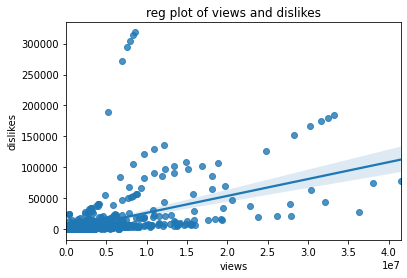

In [52]:
sns.regplot(data=Videos,x='views',y='dislikes')
plt.title("reg plot of views and dislikes")

In [53]:
df_corr=Videos[['views','likes','dislikes']]

In [54]:
Corr=df_corr.corr()
Corr

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

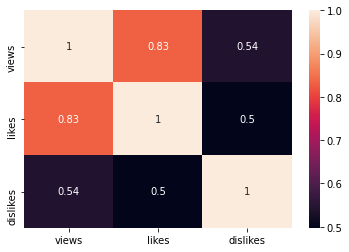

In [55]:
sns.heatmap(Corr,linecolor='black',annot=True)


